## Import packages

In [1]:
import mne
from matplotlib import pyplot as plt
import numpy as np
import yasa

## Import data

input your data path, or use os.path.join to add file path

In [6]:

file = r'D:\编程项目\sleep-eeg\sleep_eeg\SleepData\SC4001E0-PSG.edf'
raw = mne.io.read_raw_edf(file, preload=True, infer_types=True)
raw.crop(tmin=60, tmax=None)


Extracting EDF parameters from D:\编程项目\sleep-eeg\sleep_eeg\SleepData\SC4001E0-PSG.edf...
EDF file detected
Channel 'EEG Fpz-Cz' recognized as type EEG (renamed to 'Fpz-Cz').
Channel 'EEG Pz-Oz' recognized as type EEG (renamed to 'Pz-Oz').
Channel 'EOG horizontal' recognized as type EOG (renamed to 'horizontal').
Channel 'Resp oro-nasal' recognized as type RESP (renamed to 'oro-nasal').
Channel 'EMG submental' recognized as type EMG (renamed to 'submental').
Channel 'Temp rectal' recognized as type TEMP (renamed to 'rectal').
Setting channel info structure...
Creating raw.info structure...


C:\Users\wangdinglan\AppData\Local\Temp\ipykernel_7812\837035399.py:2: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file, preload=True, infer_types=True)
C:\Users\wangdinglan\AppData\Local\Temp\ipykernel_7812\837035399.py:2: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file, preload=True, infer_types=True)
C:\Users\wangdinglan\AppData\Local\Temp\ipykernel_7812\837035399.py:2: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(file, preload=True, infer_types=True)


Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


<RawEDF | SC4001E0-PSG.edf, 7 x 7944000 (79440.0 s), ~424.3 MB, data loaded>

## Prep

* Crop data according to "Marker event" channel
* Filter data

In [8]:
marker_signal, times = raw.get_data(picks=['Event marker'], return_times=True)
marker_signal = marker_signal.flatten()

tmin = times[marker_signal < 400][0]
tmax = times[marker_signal < 400][-1]
raw.crop(tmin, tmax)
raw.filter(0.5, 30)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (6.610 s)



<RawEDF | SC4001E0-PSG.edf, 7 x 2036976 (20369.8 s), ~108.8 MB, data loaded>

Check channel names and types

In [ ]:
print(raw.ch_names)
print(raw.get_channel_types())

['Fpz-Cz', 'Pz-Oz', 'horizontal', 'oro-nasal', 'submental', 'rectal', 'Event marker']
['eeg', 'eeg', 'eog', 'resp', 'emg', 'temperature', 'eeg']


## Auto-staging

In [ ]:
y_pred = yasa.SleepStaging(
    raw, 
    eeg_name='Fpz-Cz',
    eog_name='horizontal', 
    emg_name='submental'
    ).predict()

y_pred

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\Softwares\anaconda3\envs\mne\lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
d:\Softwares\anaconda3\envs\mne\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N1', 'N1',
       'N1', 'N1', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N3', 'N3', 'N2', 'N2',
       'W', 'N2', 'N2', 'N2', 'N2', 'N2', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N

## Time-freq gram

In [ ]:
hypno_int = yasa.hypno_str_to_int(y_pred)
hypno_int
sf = raw.info['sfreq']

data = raw.get_data(picks=['Fpz-Cz'])
data = data.flatten()
hypno = yasa.hypno_upsample_to_data(hypno=hypno_int, sf_hypno=(1/30), data=data, sf_data=sf)

06-9月-24 22:33:34 | WARNING | Hypnogram is SHORTER than data by 29.76 seconds. Padding hypnogram with last value to match data.size.


d:\Softwares\anaconda3\envs\mne\lib\site-packages\yasa\plotting.py:310: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf, "S")).freqstr
d:\Softwares\anaconda3\envs\mne\lib\site-packages\yasa\hypno.py:483: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return self.hypno.replace(self.mapping).astype(np.int16)
d:\Softwares\anaconda3\envs\mne\lib\site-packages\yasa\hypno.py:483: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  return s

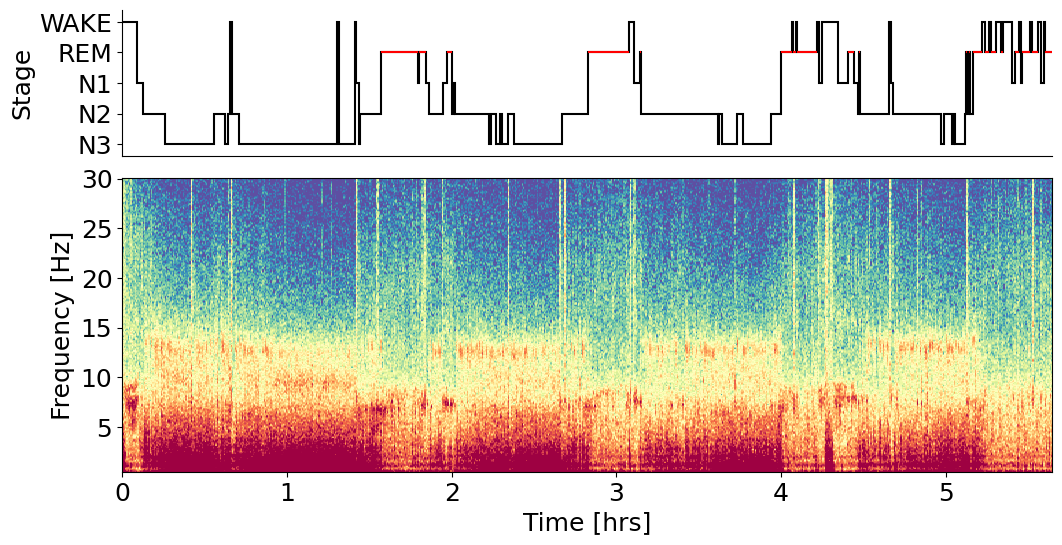

In [ ]:
fig = yasa.plot_spectrogram(data, sf, hypno=hypno, fmax=30, cmap='Spectral_r', trimperc=5)


# Sleep statistics

In [ ]:
sl_stat = yasa.sleep_statistics(hypno_int, 1/30)
for k, w in sl_stat.items():
    if 'Lat' in k:
        print(f'{k} of the subject is {w:.2f} min')


Lat_N1 of the subject is 5.50 min
Lat_N2 of the subject is 7.50 min
Lat_N3 of the subject is 15.50 min
Lat_REM of the subject is 94.50 min
